# Задание 3

## Задача 1

Приведенная ниже программа решает задачу Коши для произвольного скалярного обыкновенного дифференциального уравнения (ОДУ):
$$ u_x = f (x, u)$$
$$ u(0) = u_0$$
Функции $f(x, u)$ и $f_u(x, u)$ задаются в программе явно.

### Метод Рунге-Кутта

Семейство явных методов Рунге-Кутта задаётся формулами:
    $$u_{n+1} = u_n + h \sum_{i=1}^{s} b_i k_i,$$

где $h$ — величина шага сетки по $x$, и вычисление нового значения проходит в $s$ этапов:
    \begin{array}\\
    k_{1}=&f(x_{n}, u_{n}),\\
    k_{2}=&f(x_{n}+c_{2}h,u_{n}+a_{21}h k_{1}),\\
    \cdots &\\
    k_{s}=&f(x_{n}+c_{s}h,u_{n}+a_{s1}hk_{1}+a_{s2}hk_{2}+\cdots +a_{s,s-1}hk_{s-1})
    \end{array}
    
Конкретный метод определяется числом $s$ коэффициентами $b_i , a_{ij}$ и $c_i$. Эти коэффициенты часто упорядочивают в таблицу (называемую *таблицей Батчера*):
    $$\begin{array}{c|ccccc}0&&&&&\\c_{2}&a_{21}&&&&\\c_{3}&a_{31}&a_{32}&&&\\\vdots &\vdots &\vdots &\ddots &&\\c_{s}&a_{s1}&a_{s2}&\dots &a_{s,s-1}&\\\hline &b_{1}&b_{2}&\dots &b_{s-1}&b_{s}\end{array} = {\begin{array}{c|c}{\mathbf {c}}&A\\\hline &{\mathbf {b^{T}}}\\\end{array}}$$

Для коэффициентов метода Рунге-Куттa должны быть выполнены условия $\sum _{j=1}^{i-1}a_{ij}=c_{i}$ для $i=2,\ldots ,s$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

c = np.array([0, 2 / 3, 2 / 3])
b = np.array([1 / 4, 1 / 2, 1 / 4])
A = np.array([[0, 0, 0],
              [2 / 3, 0, 0],
              [-1 / 3, 1, 0]])

In [2]:
def runge_kutta_method(a, b, c, f, x_grid, u_0):
    u_grid = np.zeros_like(x_grid)
    u_grid[0] = u_0
    s = b.shape[0]
    for n in range(0, len(x_grid) - 1):
        h = x_grid[n + 1] - x_grid[n]
        k = np.zeros_like(c)
        k[0] = f(x_grid[n], u_grid[n])
        for j in range(1, s):
            k[j] = f(x_grid[n] + c[j] * h, u_grid[n] + (a[j][:j] * k[:j]).sum() * h)
        u_grid[n + 1] = u_grid[n] + h * (b * k).sum()
    return u_grid

In [3]:
def norma(x):
    n = x.shape[0]
    result = 0
    for i in range(n):
        result += np.abs(x[i])
    return result

### *Пример 1* 

$ u_x = f(x, u)$, $\;f(x, u) = \frac{3u}{x} + x^3 + x$, начальное условие $u(1) = 3$. Легко получить аналитически, что общее решение данного уравнения $u = x^4 - x^2 + C|x|^3$, а решение, удовлетворяющее начальному условию:
$$u = x^4 - x^2 + 3|x|^3$$

In [18]:
# Пример 1
f = lambda x, y: 3 * y / x + x ** 3 + x
u_precise = lambda x: x ** 4 - x ** 2 + 3 * np.abs(x) ** 3 
u_0 = 3
left = 1  # левая граница
right = 6  # правая граница
n = 5  # число узлов равномерной сетки
x_grid = np.linspace(left, right, n)

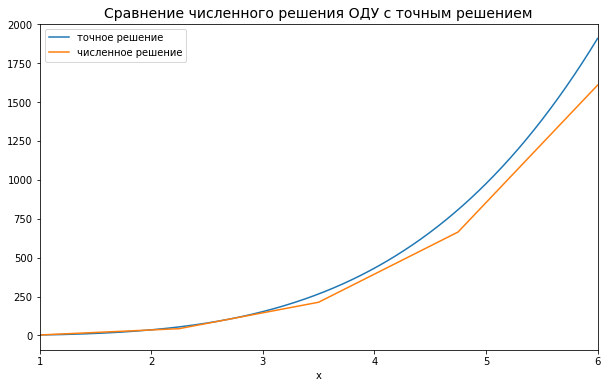

In [19]:
u_grid = runge_kutta_method(A, b, c, f, x_grid, u_0)
plt.figure(figsize=(10, 6))
x_dots = np.linspace(left, right, 10 ** 4)
plt.plot(x_dots, u_precise(x_dots), label=u"точное решение")
plt.plot(x_grid, u_grid, label=u"численное решение")
plt.title(u"Сравнение численного решения ОДУ с точным решением", fontsize=14)
plt.xlabel("x")
plt.xlim(left, right)
#plt.ylim(0, 0.02)
plt.legend()
plt.show()

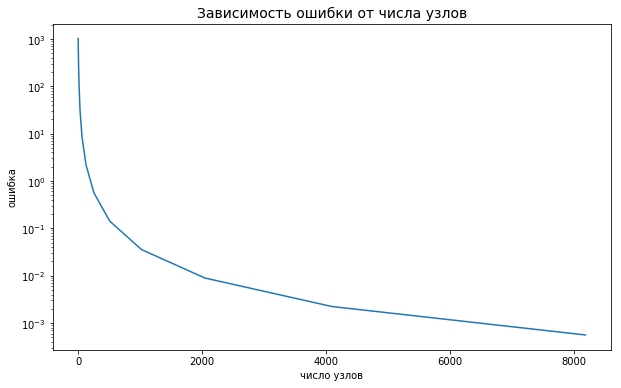

Получившийся порядок аппроксимации 1.99911236183


In [17]:
accuracy = 1E-3
errors = []
nodes_numbers = [2, ]
x_grid = np.linspace(left, right, nodes_numbers[-1])
u_grid = runge_kutta_method(A, b, c, f, x_grid, u_0)
errors.append(norma(u_grid - u_precise(x_grid)))
while errors[-1] >= accuracy:
    nodes_numbers.append(nodes_numbers[-1] * 2)
    x_grid = np.linspace(left, right, nodes_numbers[-1])
    u_grid = runge_kutta_method(A, b, c, f, x_grid, u_0)
    errors.append(norma(u_grid - u_precise(x_grid)))

plt.figure(figsize=(10, 6))
plt.yscale('log')
plt.plot(nodes_numbers, errors)
plt.title(u"Зависимость ошибки от числа узлов", fontsize=14)
plt.xlabel(u"число узлов")
plt.ylabel(u"ошибка")
plt.show()

print(u"Получившийся порядок аппроксимации", np.log2(errors[-2] / errors[-1]))